In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,8)

## Regressie

In [3]:
df = pd.DataFrame({'x' : range(1,101)}).assign(y = lambda d: 10*d.x -0.2*(d.x)**2 + np.random.normal(0.0, 100, 100))
df.head()

,x,y
0,1,-169.991254
1,2,-154.344542
2,3,-54.373094
3,4,3.643814
4,5,55.909440


<AxesSubplot:xlabel='x', ylabel='y'>

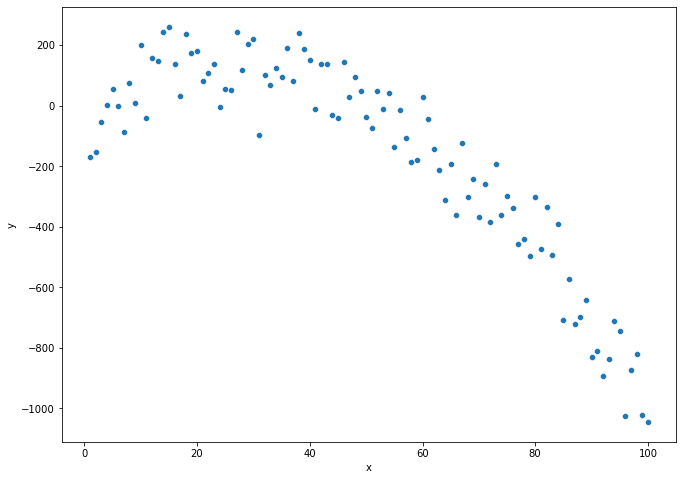

In [4]:
sns.scatterplot(x="x", y="y", data=df)

In [5]:
import statsmodels.api as sm

In [6]:
reg = sm.OLS(df.y, sm.add_constant(df.x)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     233.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.04e-27
Time:                        15:05:06   Log-Likelihood:                -664.18
No. Observations:                 100   AIC:                             1332.
Df Residuals:                      98   BIC:                             1338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.1388     37.752      8.825      0.000     258.222     408.056
x             -9.9264      0.649    -15.295      0.000     -11.214      -8.638
==============================================================================
Omnibus:                        7.788   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.257
Skew:                          -0.690   Prob(JB):                       0.0161
Kurtosis:                       2.725   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
y = np.array(df.y)
X = np.array(df.x).reshape(-1, 1)

reg = LinearRegression().fit(X, y)

In [10]:
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

0.7047528486152846
[-9.92636902]
333.13883584418886


In [11]:
df['y_reg'] = reg.predict(X)

<AxesSubplot:xlabel='x', ylabel='y2'>

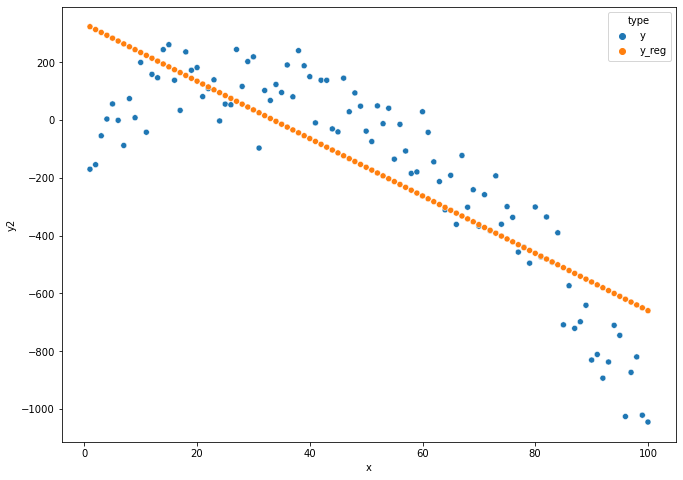

In [12]:
df2 = df.melt(id_vars='x', var_name='type', value_name = 'y2')

sns.scatterplot(x="x", y="y2", data=df2, hue="type")

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dt = DecisionTreeRegressor(min_samples_leaf = 20).fit(X, y)

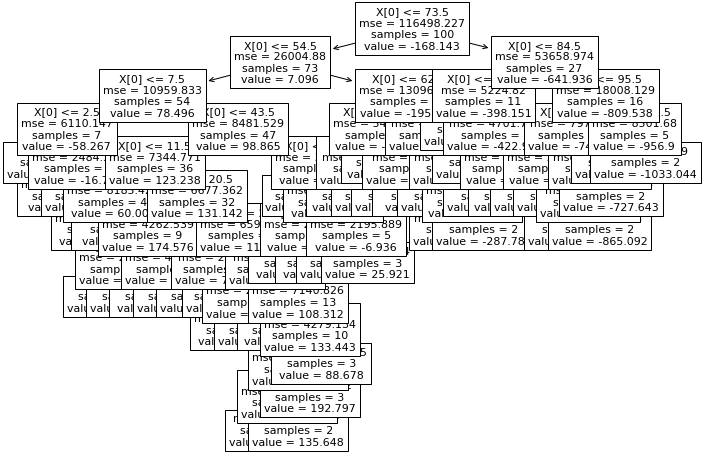

In [19]:
from sklearn import tree
tree.plot_tree(dt, fontsize=11)
fontsize=plt.show()

In [ ]:
print(dt.score(X,y))

In [20]:
df['y_tree'] = dt.predict(X)

<AxesSubplot:xlabel='x', ylabel='y2'>

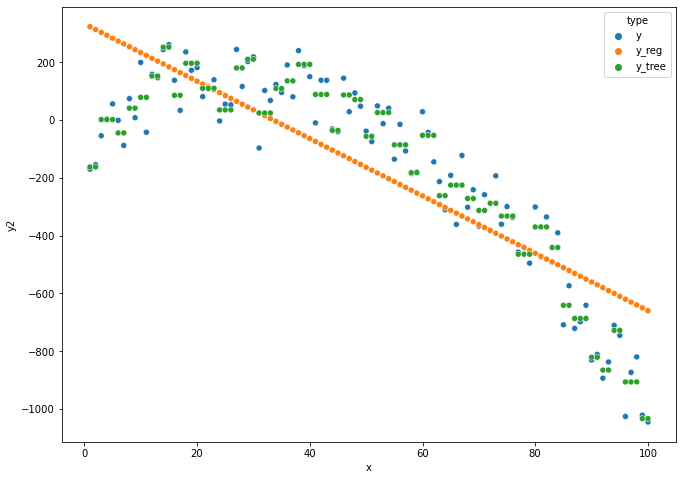

In [21]:
df2 = df.melt(id_vars='x', var_name='type', value_name = 'y2')

sns.scatterplot(x="x", y="y2", data=df2, hue="type")

## Classificatie

In [22]:
df_class = pd.DataFrame({'x' : range(1,101)}).assign(y = lambda d: np.where((d.x < 20) | (d.x > 60), 1, 0))
df_class.head()

,x,y
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


<AxesSubplot:xlabel='x', ylabel='y'>

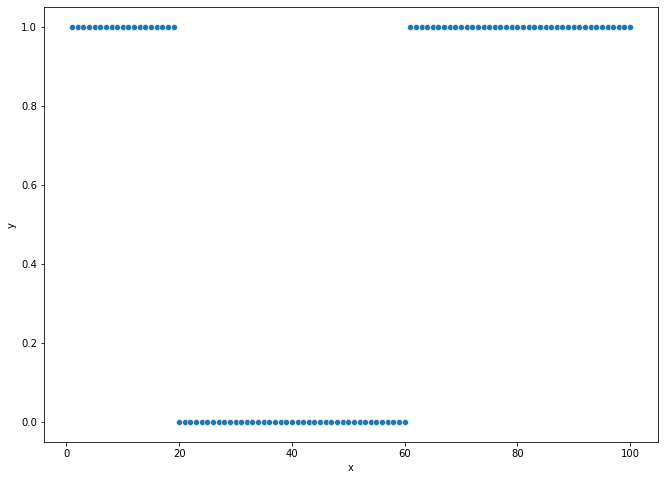

In [23]:
sns.scatterplot(x="x", y="y", data=df_class)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
y2 = np.array(df_class.y)
X2 = np.array(df_class.x).reshape(-1, 1)

logit = LogisticRegression(random_state=0).fit(X2, y2)

In [26]:
df_class['y_logit'] = logit.predict(X2)
logit.score(X2, y2)

0.53

<AxesSubplot:xlabel='x', ylabel='y'>

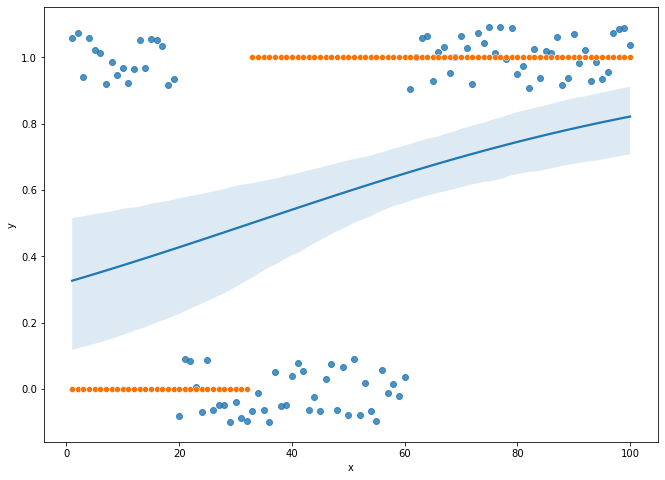

In [27]:
fig, ax = plt.subplots()
sns.regplot(x="x", y="y", data=df_class, y_jitter = 0.1, logistic = True, ax = ax)
sns.scatterplot(x = "x", y = "y_logit", data = df_class, ax = ax, color = "#f97306")

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt2 = DecisionTreeClassifier().fit(X2, y2)

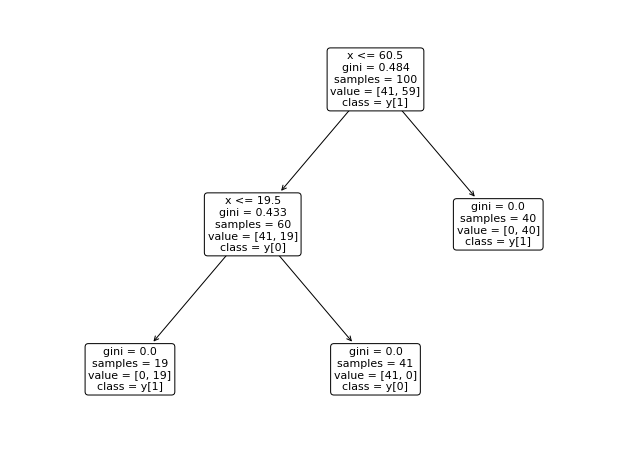

In [31]:
tree.plot_tree(dt2, fontsize=11, rounded = True, class_names = True, feature_names = "x")
fontsize=plt.show()

In [32]:
df_class['y_tree'] = dt2.predict(X2)
dt2.score(X2, y2)

1.0

<AxesSubplot:xlabel='x', ylabel='y'>

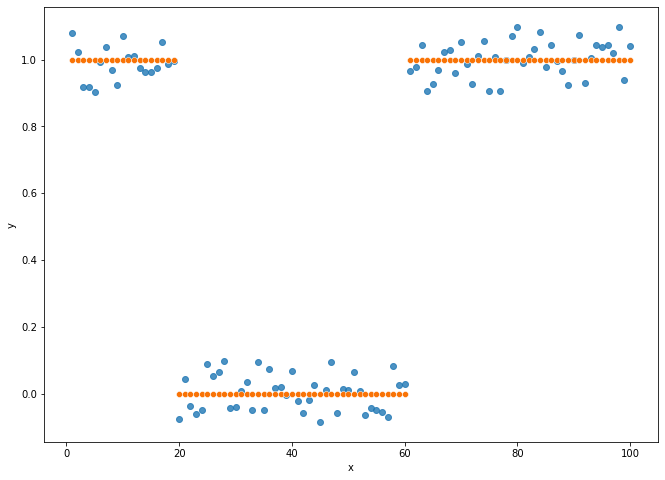

In [33]:
fig, ax = plt.subplots()
sns.regplot(x="x", y="y", data=df_class, y_jitter = 0.1, logistic = True, ax = ax, fit_reg = False)
sns.scatterplot(x = "x", y = "y_tree", data = df_class, ax = ax, color = "#f97306")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier().fit(X2, y2)

In [ ]:
rf.n_features_